### 3 sample일 때 Venn diagram으로 표현하기

In [1]:
import vcf 
import vcf.filters
DIR = "/data/project/OPLL/04.WES/04.mutect/04.rescue"
vcf_reader = vcf.Reader(open(DIR + "/230511_OLF.MT2.FMC.HF.RMBLACK.vep.rescue.vcf", "r"))

#print (vcf_reader.fetch ("4", 100000, 200000))


#     print (record.call_rate)
#     print (  record.samples [1].phased ) 

vcf_ob = vcf.filters.Base (  vcf_reader )
vcf_ob.SiteQuality = 30
#print (vcf_ob.SiteQuality)

for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
    vcf_ob.SiteQuality (record)

TypeError: 'int' object is not callable

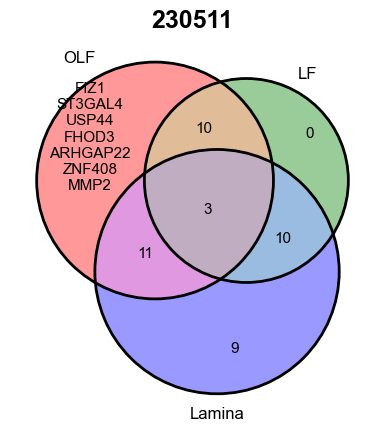

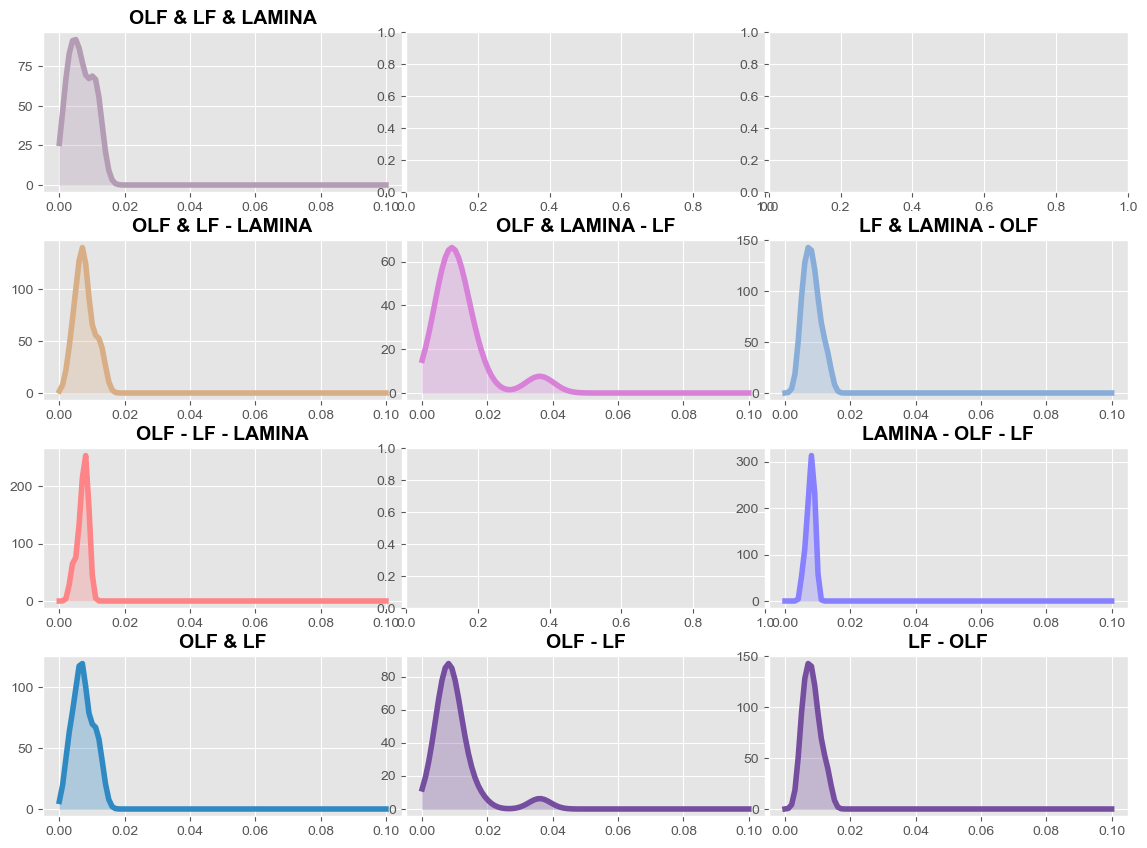

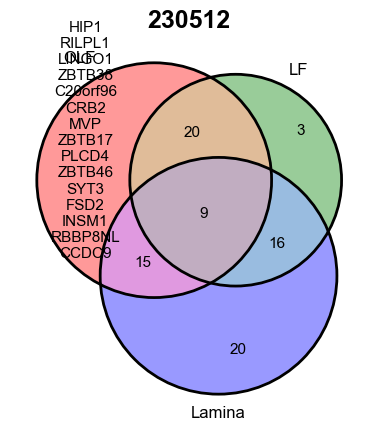

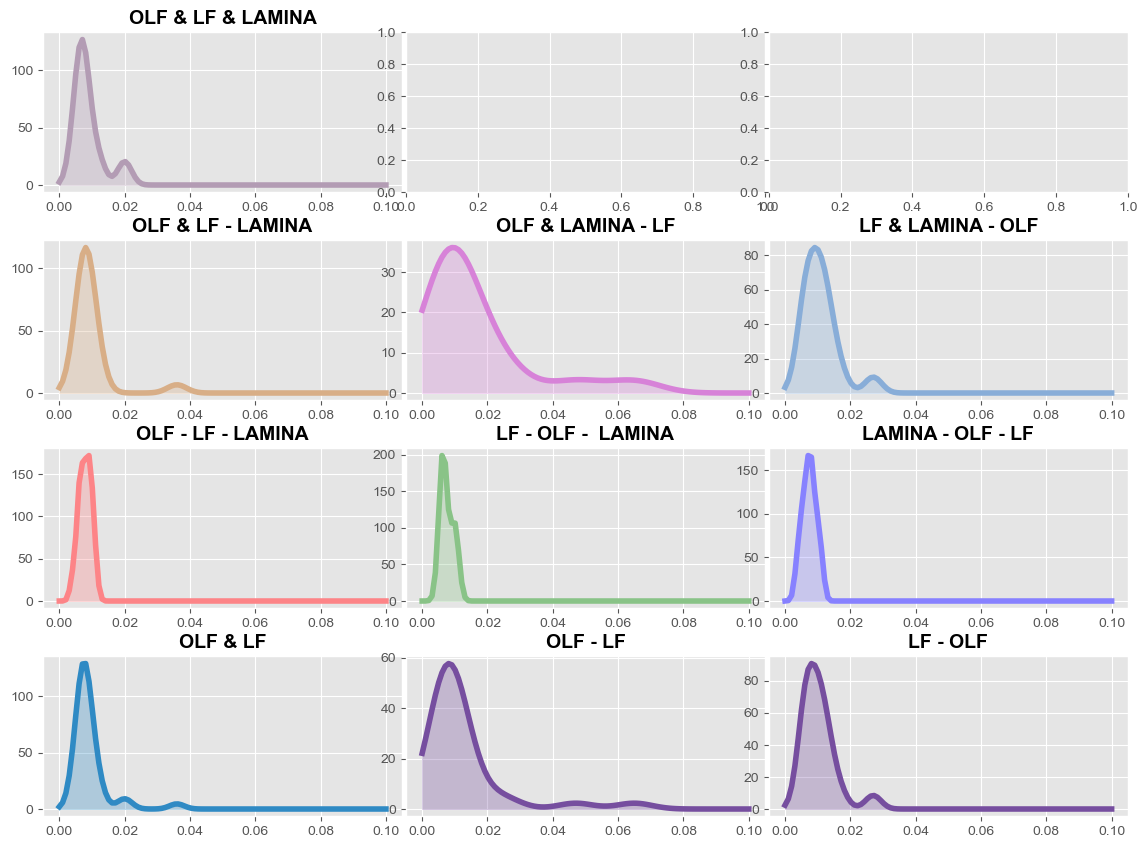

In [25]:
import vcf
import palettable
import os.path
import argparse
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
plt.rcParams["font.family"] = 'arial'
plt.style.use ('ggplot')

DIR = "/data/project/OPLL/02.WES/04.mutect/04.rescue"

MIN_BLOCK_SHARED = 1


def Retrieve_Gene_Symbol (record):
    try:
        Gene_Symbol = (record.INFO["CSQ"][0].split("|")[3])       # 일단 맨 상위 script만 보자
        if record.INFO["CSQ"][0].split("|")[1] == "intergenic_variant":
            Gene_Symbol = "intergenic_variant"
        elif record.INFO["CSQ"][0].split("|")[1] == "regulatory_region_variant":
            Gene_Symbol = "regulatory_region_variant"
    except:
        Gene_Symbol = ""

    return Gene_Symbol



def visualization_venn3 (Set_A, Set_B, Set_C, date, label_list, OUTPUT_PATH):

    if not os.path.exists (  "/".join( OUTPUT_PATH.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_PATH.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = (5, 5 ) )
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    venn = venn3([Set_A, Set_B, Set_C], set_labels=( label_list[0], label_list[1], label_list[2]))
    circles = venn3_circles([Set_A, Set_B, Set_C])

    # Customize the Venn diagram if needed
    venn.get_label_by_id('100').set_text( '{}'.format("\n".join( Set_A - Set_B - Set_C) ))

    for text in venn.subset_labels:
        text.set_fontsize(11)

    plt.savefig ( OUTPUT_PATH )
    plt.show()
                

def visualization_venn2 (Set_A, Set_B, date, label_list, OUTPUT_PATH):

    if not os.path.exists (  "/".join( OUTPUT_PATH.split("/")[:-1]  ) ):
        os.makedirs ( "/".join( OUTPUT_PATH.split("/")[:-1]  )  )

    fig, ax = plt.subplots( figsize = (5, 5 ) )
    ax.set_title (date, {'fontsize': 18, 'fontweight' : 'bold'})

    venn = venn2([Set_A, Set_B], set_labels=( label_list[0], label_list[1] ))
    circles = venn2_circles([Set_A, Set_B ])

    # Customize the Venn diagram if needed
    #venn.get_label_by_id('11').set_text( '{}'.format("\n".join( Set_A & Set_B) ))

    for text in venn.subset_labels:
        text.set_fontsize(10)

    plt.savefig ( OUTPUT_PATH )
    plt.show()


def draw_densitogram ( VAF_list, title, color, ax_row, ax_col):
    from scipy.stats import kde
    import numpy as np

    if len (VAF_list) != 0:
        ax[ax_row][ax_col].set_title ( title, {'fontsize': 14, 'fontweight' : 'bold'})

        kde_np_vaf = kde.gaussian_kde( VAF_list )
        x = np.linspace(0, 0.1, 100)
        y = kde_np_vaf(x)

        max_y = 0
        if max_y < np.max(y):
            max_y = np.max(y)

        ax[ax_row][ax_col].plot(x, y, color = color, linewidth = 4)  # "#54B1EC"
        ax[ax_row][ax_col].fill_between(x, y, color = color, alpha = 0.3)

        #plt.savefig ( OUTPUT_PATH )
        #plt.show()









############# COMMON이 아니라 RESCUE call을 찾아줌 ################3

if __name__ == "__main__":
    bdo = palettable.lightbartlein.diverging.BlueDarkOrange18_18.mpl_colors
    vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
    colorlist = vivid_10[4:] + vivid_10[:4]

    for date in ["230511", "230512"]:
        cnt_TISSUE = 0
        for TISSUE in [ "OLF", "LF", "Lamina" ]:
            INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"
            if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                cnt_TISSUE = cnt_TISSUE + 1
                
        if cnt_TISSUE == 3:
            # Define the sets A, B, and C
            Set_A , Set_B, Set_C = set(), set(), set()
            VAF_dict = {"A&B&C" : [], "A&B-C" : [], "A&C-B" : [], "B&C-A" : [], "A-B-C" : [], "B-A-C" : [] , "C-A-B" : [], "A&B" : [], "A-B" : [], "B-A" : []}

            for TISSUE in [ "OLF", "LF", "Lamina" ]:
                INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"
                
                if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))
                    samplenames = vcf_reader.samples

                    variant_num = 0
                    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
                        Gene_Symbol = Retrieve_Gene_Symbol (record)

                        if TISSUE == "OLF":
                            Set_A.add ( Gene_Symbol )
                        elif TISSUE == "LF":
                            Set_B.add ( Gene_Symbol  )
                        elif (TISSUE == "Lamina"):
                            Set_C.add ( Gene_Symbol  )
                        variant_num = variant_num + 1
        
            
            # 일단 그림 그리기
            visualization_venn3 (Set_A, Set_B, Set_C, date, ["OLF", "LF", "Lamina"], "/data/project/OPLL/script/14.Shared_calls/Venn/" + date + ".jpg")

            # VAF를 dict list에 넣기
            for TISSUE in [ "OLF", "LF", "Lamina" ]:
                INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"
                if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))
            

                    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
                        Gene_Symbol = Retrieve_Gene_Symbol (record)
                        VAF = record.samples [0].data.AF[0]   # single sample vcf니까 0이면 됨

                        if Gene_Symbol in (Set_A & Set_B & Set_C):
                            VAF_dict ["A&B&C"].append (VAF)
                        elif Gene_Symbol in (Set_A & Set_B - Set_C):
                            VAF_dict ["A&B-C"].append (VAF)
                        elif Gene_Symbol in (Set_A & Set_C - Set_B):
                            VAF_dict ["A&C-B"].append (VAF)
                        elif Gene_Symbol in (Set_B & Set_C - Set_A):
                            VAF_dict ["B&C-A"].append (VAF)
                        elif Gene_Symbol in (Set_A - Set_B - Set_C):
                            VAF_dict ["A-B-C"].append (VAF)
                        elif Gene_Symbol in (Set_B - Set_A - Set_C):
                            VAF_dict ["B-A-C"].append (VAF)
                        elif Gene_Symbol in (Set_C - Set_A - Set_B):
                            VAF_dict ["C-A-B"].append (VAF)
                        if Gene_Symbol in (Set_A & Set_B):
                            VAF_dict ["A&B"].append (VAF)
                        if Gene_Symbol in (Set_A - Set_B):
                            VAF_dict ["A-B"].append (VAF)
                        if Gene_Symbol in (Set_B - Set_A):
                            VAF_dict ["B-A"].append (VAF)

            # Densitogram 그리기
            fig, ax = plt.subplots (nrows = 4, ncols =3, figsize = (14, 8))
            if not os.path.exists (  "/data/project/OPLL/script/14.Shared_calls/Densitogram" ):
                os.makedirs ( "/data/project/OPLL/script/14.Shared_calls/Densitogram"   )
            fig.subplots_adjust (wspace = 0.01, hspace = 0.3, bottom = 0.01, top = 0.99)

            draw_densitogram ( VAF_dict ["A&B&C"], "OLF & LF & LAMINA", "#B39CB4", 0, 0)
            draw_densitogram ( VAF_dict ["A&B-C"], "OLF & LF - LAMINA", "#D8AE87", 1, 0)
            draw_densitogram ( VAF_dict ["A&C-B"], "OLF & LAMINA - LF", "#D782D8", 1, 1)
            draw_densitogram ( VAF_dict ["B&C-A"], "LF & LAMINA - OLF", "#88ADD8", 1, 2)
            draw_densitogram ( VAF_dict ["A-B-C"], "OLF - LF - LAMINA", "#FD8487", 2, 0)
            draw_densitogram ( VAF_dict ["B-A-C"], "LF - OLF -  LAMINA", "#89C387", 2, 1)
            draw_densitogram ( VAF_dict ["C-A-B"], "LAMINA - OLF - LF", "#8781FF", 2, 2)
            draw_densitogram ( VAF_dict ["A&B"], "OLF & LF", colorlist[3], 3, 0)
            draw_densitogram ( VAF_dict ["A-B"], "OLF - LF", colorlist[4], 3, 1)
            draw_densitogram ( VAF_dict ["B-A"], "LF - OLF", colorlist[4], 3, 2)


        elif cnt_TISSUE == 2:
            Set_A, Set_B = set(), set()
            VAF_dict = {"A&B" : [], "A-B" : [], "B-A" : []}


            for TISSUE in ["OLF", "Lamina"]:
                INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"            
                if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))

                    variant_num = 0
                    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
                        Gene_Symbol = Retrieve_Gene_Symbol (record)

                        if TISSUE == "OLF":
                            Set_A.add ( Gene_Symbol )
                        elif TISSUE == "Lamina":
                            Set_B.add ( Gene_Symbol  )
                        variant_num = variant_num + 1

            # 일단 그림 그리기
            visualization_venn2 (Set_A, Set_B, date, ["OLF", "Lamina"], "/data/project/OPLL/script/14.Shared_calls/Venn/" + date + ".jpg")

            # VAF를 dict list에 넣기
            for TISSUE in [ "OLF", "Lamina" ]:
                INPUT_VCF = DIR + "/" + date + "_" + TISSUE + ".MT2.FMC.HF.RMBLACK.vep.rescue.vcf"
                if os.path.exists ( INPUT_VCF ) == True:  # File이 있어야 실행
                    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))

                    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
                        Gene_Symbol = Retrieve_Gene_Symbol (record)
                        VAF = round ( record.INFO['AO'][0] / record.INFO['DP'] , 2)

                        if Gene_Symbol in (Set_A & Set_B):
                            VAF_dict ["A&B"].append (VAF)
                        elif Gene_Symbol in (Set_A - Set_B):
                            VAF_dict ["A-B"].append (VAF)
                        elif Gene_Symbol in (Set_B - Set_A):
                            VAF_dict ["B-A"].append (VAF)
                    

        

### Multiple Mutect에서 shared call 구하기

In [1]:
import vcf
import sys
import os.path
import argparse

DIR = "/data/project/OPLL/02.WES/04.mutect/03.vep"

MIN_BLOCK_SHARED = 1
print ("MIN_BLOCK_SHARED = {}".format(MIN_BLOCK_SHARED))

for INPUT_VCF in [ DIR + "/230511_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230512_12.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230512_13.MT2.FMC.HF.RMBLACK.vep.vcf", DIR + "/230512_23.MT2.FMC.HF.RMBLACK.vep.vcf"]:
    print ("\n\n" + INPUT_VCF)
    vcf_reader = vcf.Reader(open(INPUT_VCF, "r"))
    samplenames = vcf_reader.samples        # ['230512_Blood', '235012_OLF']

    Venn_data = {}
    first_line = ["CHR:POS", "Gene", "Ref", "Alt", "Variant_Classification"]
    for sampleindex, samplename in enumerate(vcf_reader.samples):
        Venn_data[samplename] = []
        if "Blood" not in samplename:
            first_line.append (samplename)          # ['CHR', 'POS', '230512_Blood', '235012_OLF']


    print (*first_line, sep = "\t")

    variant_count_total = 0

    for record in vcf_reader:        # record.CHROM, recrod.POS ,record.ALT
        if record.CHROM == "chrM":
            break
        # variant가 몇 sample에서 나오는지 찾기
        count = 0
        for sampleindex, samplename in enumerate(samplenames):    # [ '230512_Blood', '235012_OLF' ]
            
            if "Blood" not in samplename:
                if record.samples[sampleindex]["GT"] not in ["./.", "0/0", "0|0"] :   # Genotype 조건 만족
                    if None not in record.samples[sampleindex]["AD"]:      # 왜인지는 모르겠으나 [25, 5, None] 같은 경우도 있다
                        if record.samples[sampleindex]["AD"][-1] != 0:
                            #print (record.CHROM, record.POS, samplename, record.samples[sampleindex]["GT"], record.samples[sampleindex]["AD"])
                            count = count  + 1


        if count >= MIN_BLOCK_SHARED:
            try:
                Gene_Symbol = (record.INFO["CSQ"][0].split("|")[3])       # 일단 맨 상위 script만 보자
                if record.INFO["CSQ"][0].split("|")[1] == "intergenic_variant":
                    Gene_Symbol = "intergenic_variant"
                elif record.INFO["CSQ"][0].split("|")[1] == "regulatory_region_variant":
                    Gene_Symbol = "regulatory_region_variant"
            except:
                Gene_Symbol = ""
                
            line = [str(record.CHROM) + ":" + str(record.POS), str(Gene_Symbol), str(record.REF), str(record.ALT)[1:-1], record.INFO["CSQ"][0].split("|")[1] ]
            
            check = 0
            for sampleindex, samplename in enumerate(samplenames):
                if "Blood" not in samplename:
                    line.append('.'.join([str(a) for a in record.samples[sampleindex]["AD"]]))       # "REF.ALT"
                    if (0 in record.samples[sampleindex]["AD"]) | (  int ( record.samples[sampleindex]["AD"][1] )  < 2):
                        check = 1
        
            
            if check == 0:
                print ("\t".join(line))
                variant_count_total = variant_count_total + 1


    print ("총 Variant = {}개".format(variant_count_total))



MIN_BLOCK_SHARED = 1


/data/project/OPLL/02.WES/04.mutect/03.vep/230511_12.MT2.FMC.HF.RMBLACK.vep.vcf
CHR:POS	Gene	Ref	Alt	Variant_Classification	230511_LF	230511_OLF
chr2:130915649	ARHGEF4	C	T	upstream_gene_variant	157.3	120.2
chr3:138946621	FOXL2NB	TGGGCTCGGCGGCGGCCCTTCTGGCTCCTTGACTGTGCGACCGGTCTCTGGGGCCAGCAGGGCCCCCGCCGCGTCCTC	T	upstream_gene_variant	286.4	314.3
chr10:97334189	FRAT2	GTAGGGCGCAGCGCGTCCGCGCACGCGGCCGCGGTCCCC	G	frameshift_variant	379.8	454.4
chr12:50814135	ATF1	G	A	missense_variant	139.3	113.2
chr17:7563600	TNFSF12-TNFSF13	C	T	downstream_gene_variant	98.2	119.3
chr19:8980155	MUC16	A	G	synonymous_variant	133.2	123.3
총 Variant = 6개


/data/project/OPLL/02.WES/04.mutect/03.vep/230512_12.MT2.FMC.HF.RMBLACK.vep.vcf
CHR:POS	Gene	Ref	Alt	Variant_Classification	230512_LF	230512_OLF
chr1:52384659	ORC1	C	T	missense_variant	135.3	128.2
chr1:149943895	OTUD7B	G	A	downstream_gene_variant	119.2	112.3
chr1:193097697	GLRX2	C	T	missense_variant	146.2	183.4
chr3:37629308	ITGA9	A	G	missense